In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import itertools as it
from random import randint
import time

In [ ]:
def dist(node1, node2):
  xDifSq = node1.point[0]-node2.point[0]
  yDifSq = node1.point[1]-node2.point[1]
  xDifSq = math.pow(xDifSq,2)
  yDifSq = math.pow(yDifSq,2)
  return math.sqrt(xDifSq + yDifSq)

def engine(num):
  if num == 1:
    return 1
  return num * engine(num-1)

In [ ]:
class Node:
  def __init__(self, x, y):
      self.point = [x,y]

In [ ]:
class Graph:
  def __init__(self, array):
    self.nodes = array

  def addNodes(self, node):
    self.nodes = np.append(self.nodes, node)

  def removeNode(self, node):
    self.nodes = np.delete(self.nodes, node)

  def plotGraph(self, color='orange'):
      xCoord = []
      yCoord = []
      for node in self.nodes:
        xCoord.append(node.point[0])
        yCoord.append(node.point[1]) 
      plt.grid(True)
      plt.scatter(xCoord,yCoord,color=color)

In [ ]:
class Hamilton(Graph):
  def __init__(self, graph):
    self.nodes = graph.nodes
    self.addNodes(graph.nodes[0])
    self.distance = 0;
    numElements = len(self.nodes)
    for i in range(1,numElements):
      self.distance += dist(self.nodes[i], self.nodes[(i-1)])

  def plotHamilton(self, col = 'blue'):
      xCoord = []
      yCoord = []
      for node in self.nodes:
        xCoord.append(node.point[0])
        yCoord.append(node.point[1]) 
      plt.grid(True)
      plt.plot(xCoord,yCoord,color=col, linestyle='dashed')
      self.plotGraph()

In [ ]:
def brutForceTSP(graph):
  permOfNodes = list(it.permutations(graph.nodes))
  permOfNodes = np.array(permOfNodes)
  minHamilton = Hamilton(Graph(permOfNodes[0]))
  for i in permOfNodes:
    if i[0] != graph.nodes[0]:
      return minHamilton 
    actualHamilton = Hamilton(Graph(i))   
    if actualHamilton.distance < minHamilton.distance:
      minHamilton = actualHamilton
  return minHamilton

In [ ]:
def brutForceTSPplotAll(graph):
  permOfNodes = list(it.permutations(graph.nodes))
  permOfNodes = np.array(permOfNodes)
  minHamilton = Hamilton(Graph(permOfNodes[0]))
  minHamilton.plotHamilton('green')
  plt.show()
  for i in permOfNodes:
    if i[0] != graph.nodes[0]:
      return minHamilton 
    actualHamilton = Hamilton(Graph(i)) 
    if actualHamilton.distance <= minHamilton.distance:
      minHamilton = actualHamilton
      plt.clf()
      minHamilton.plotHamilton('green')
      plt.show() 
    else:
      plt.clf()
      actualHamilton.plotHamilton('red')
      plt.show() 
  return minHamilton

In [ ]:
def brutForceTSPplotNewBest(graph):
  permOfNodes = list(it.permutations(graph.nodes))
  permOfNodes = np.array(permOfNodes)
  minHamilton = Hamilton(Graph(permOfNodes[0]))
  minHamilton.plotHamilton('green')
  plt.show()
  for i in permOfNodes:
    if i[0] != graph.nodes[0]:
      return minHamilton 
    actualHamilton = Hamilton(Graph(i)) 
    if actualHamilton.distance < minHamilton.distance:
      minHamilton = actualHamilton
      plt.clf()
      minHamilton.plotHamilton('green')
      plt.show() 
  return minHamilton

In [ ]:
def generateGraph(numOfNodes = 5, minX = 0, maxX = 100, minY = 0, maxY = 100):
  g = Graph(np.empty(0))
  for i in range(0, numOfNodes):
    x = randint(minX, maxX)
    y = randint(minY, maxY)
    g.addNodes(Node(x,y))
  return g 

In [ ]:
def timeBrutal(sample = 5, start=2, stop=5):
  solutionX = []
  solutionY = []
  for i in range(start, stop+1):
    summary = 0
    for k in range(0,sample):
      t0 = time.clock()
      g = generateGraph(i)
      h = brutForceTSP(g)
      t1 = time.clock()
      summary = summary + (t1-t0)
    avg = summary/sample
    solutionX.append(i)
    solutionY.append(avg)
  return [solutionX,solutionY]

In [ ]:
def timeApprox(sample = 5, start=2, stop=5):
  solutionX = []
  solutionY = []
  for i in range(start, stop+1):
    summary = 0
    for k in range(0,sample):
      t0 = time.clock()
      g = generateGraph(i)
      h = approxTSP(g)
      t1 = time.clock()
      summary = summary + (t1-t0)
    avg = summary/sample
    solutionX.append(i)
    solutionY.append(avg)
  return [solutionX,solutionY]

In [ ]:
class treeNode:
  def __init__(self, root, key = 0):
    self.key = key
    self.root = root
    self.childs = []

  def addLink(self, node):
    self.childs.append(node)
  
  def plotTree(self, color="blue", it=True):
    for i in self.childs:
      plt.plot([self.root.point[0],i.root.point[0]],[self.root.point[1],i.root.point[1]], color=color)
      plt.scatter([self.root.point[0],i.root.point[0]],[self.root.point[1],i.root.point[1]], color=color)
      i.plotTree(color=color,it=False)
    if it == True:
      plt.scatter([self.root.point[0]],[self.root.point[1]], color="blue")
      plt.show()
      
  def preorder(self):
    array = np.array(self.root)
    for i in self.childs:
      array = np.append(array,i.preorder())
    return array

In [ ]:
def adjacencyMatrix(graph = generateGraph(5)):
  matrix = []
  for i in graph.nodes:
    adjNode = []
    for j in graph.nodes:
      adjNode.append(dist(i,j))
    matrix.append(adjNode)
  return matrix    

In [ ]:
def mstPrim(graph = generateGraph(5)):
  INF = 9999999
  N = len(graph.nodes)

  G = adjacencyMatrix(graph)

  selected_node = []
  nodes = []
  for i in range(0,N):
    selected_node.append(0)
    nodes.append(treeNode(graph.nodes[i],i))

  no_edge = 0
  selected_node[0] = True

  while (no_edge < N - 1):
      
      minimum = INF
      a = 0
      b = 0
      for m in range(N):
          if selected_node[m]:
              for n in range(N):
                  if ((not selected_node[n]) and G[m][n]):  
                      if minimum > G[m][n]:
                          minimum = G[m][n]
                          a = m
                          b = n
      nodes[a].addLink(nodes[b])
      selected_node[b] = True
      no_edge += 1

  return nodes[0]

In [ ]:
def approxTSP(graph = generateGraph(5)):
  mstTree = mstPrim(graph)
  nodes = mstTree.preorder()
  hamilton = Hamilton(Graph(nodes))
  return hamilton

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


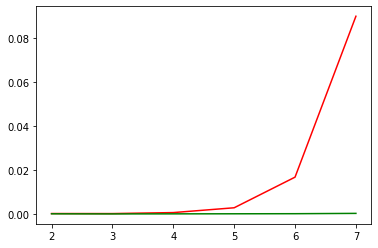

In [ ]:
timBrutal = timeBrutal(stop = 7, sample=5)
timApprox = timeApprox(stop = 7, sample=5)
plt.plot(timBrutal[0], timBrutal[1], color="red")
plt.plot(timApprox[0], timApprox[1], color="green")

In [ ]:
g = generateGraph(8)  

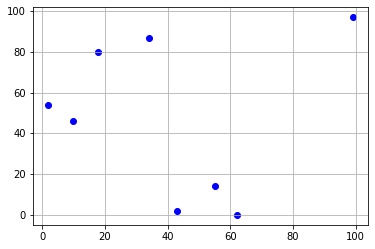

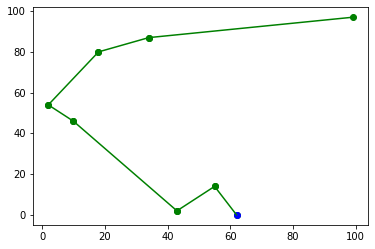

316.511550467275


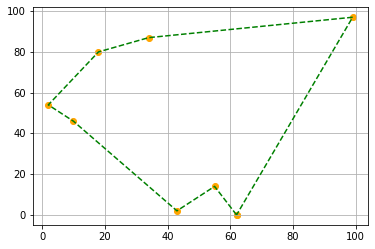

In [ ]:
h2 = approxTSP(g)
g.plotGraph("blue")
plt.show()
root = mstPrim(g)
root.plotTree(color="green")
h2.plotHamilton('green')
print(h2.distance)

308.77028508765574


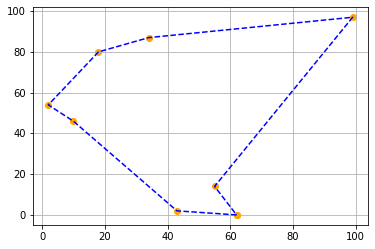

In [ ]:
h1 = brutForceTSP(g)
h1.plotHamilton('blue')
print(h1.distance)

In [ ]:
max = 0.0
for i in range(0,100):
  g = generateGraph(5)
  h1 = brutForceTSP(g)
  h2 = approxTSP(g)
  if max < (h2.distance/h1.distance):
    max = (h2.distance/h1.distance)
print(max)

1.2210132966172005
